# Volkswagen_used_car_EDA_scatter_Regression_pair_plot

### submited by: Subrata Saha
### Date: 25.02.2022

#### Objectives:
- Scatter plot
- Regression line
- Pair plot

#### 1.  Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('talk')

#### 2. Load the dataset

In [3]:
df = pd.read_csv("vw.csv")

display(df.head())
# print(df.head())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,39.8,1.5


#### 3. EDA

In [31]:
print(len(df["model"].unique()))

27


In [8]:
print(df["transmission"].unique())

print(len(df["transmission"].unique()))

['Automatic' 'Manual' 'Semi-Auto']
3


In [9]:
print(df["fuelType"].unique())

print(len(df["fuelType"].unique()))

['Diesel' 'Petrol' 'Other' 'Hybrid']
4


In [10]:
print(df.shape)

(15157, 8)


In [12]:
# statistics
display(df.describe())

,year,price,mileage,mpg,engineSize
count,15157.000000,15157.000000,15157.000000,15157.000000,15157.000000
mean,2017.255789,16838.952365,22092.785644,53.753355,1.600693
std,2.053059,7755.015206,21148.941635,13.642182,0.461695
min,2000.000000,899.000000,1.000000,0.300000,0.000000
25%,2016.000000,10990.000000,5962.000000,46.300000,1.200000
50%,2017.000000,15497.000000,16393.000000,53.300000,1.600000
75%,2019.000000,20998.000000,31824.000000,60.100000,2.000000
max,2020.000000,69994.000000,212000.000000,188.300000,3.200000


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   mpg           15157 non-null  float64
 7   engineSize    15157 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 947.4+ KB


In [14]:
# another way to check missing value
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
mpg             0
engineSize      0
dtype: int64

#### 4. Find the relation between the numerical variables


- Scatterplot of mileage vs price
- Scatterplot of mpg vs price
- Scatterplot of engineSize vs price

<br> **NOTE**: price is target variable, all other columns represent feature variables.

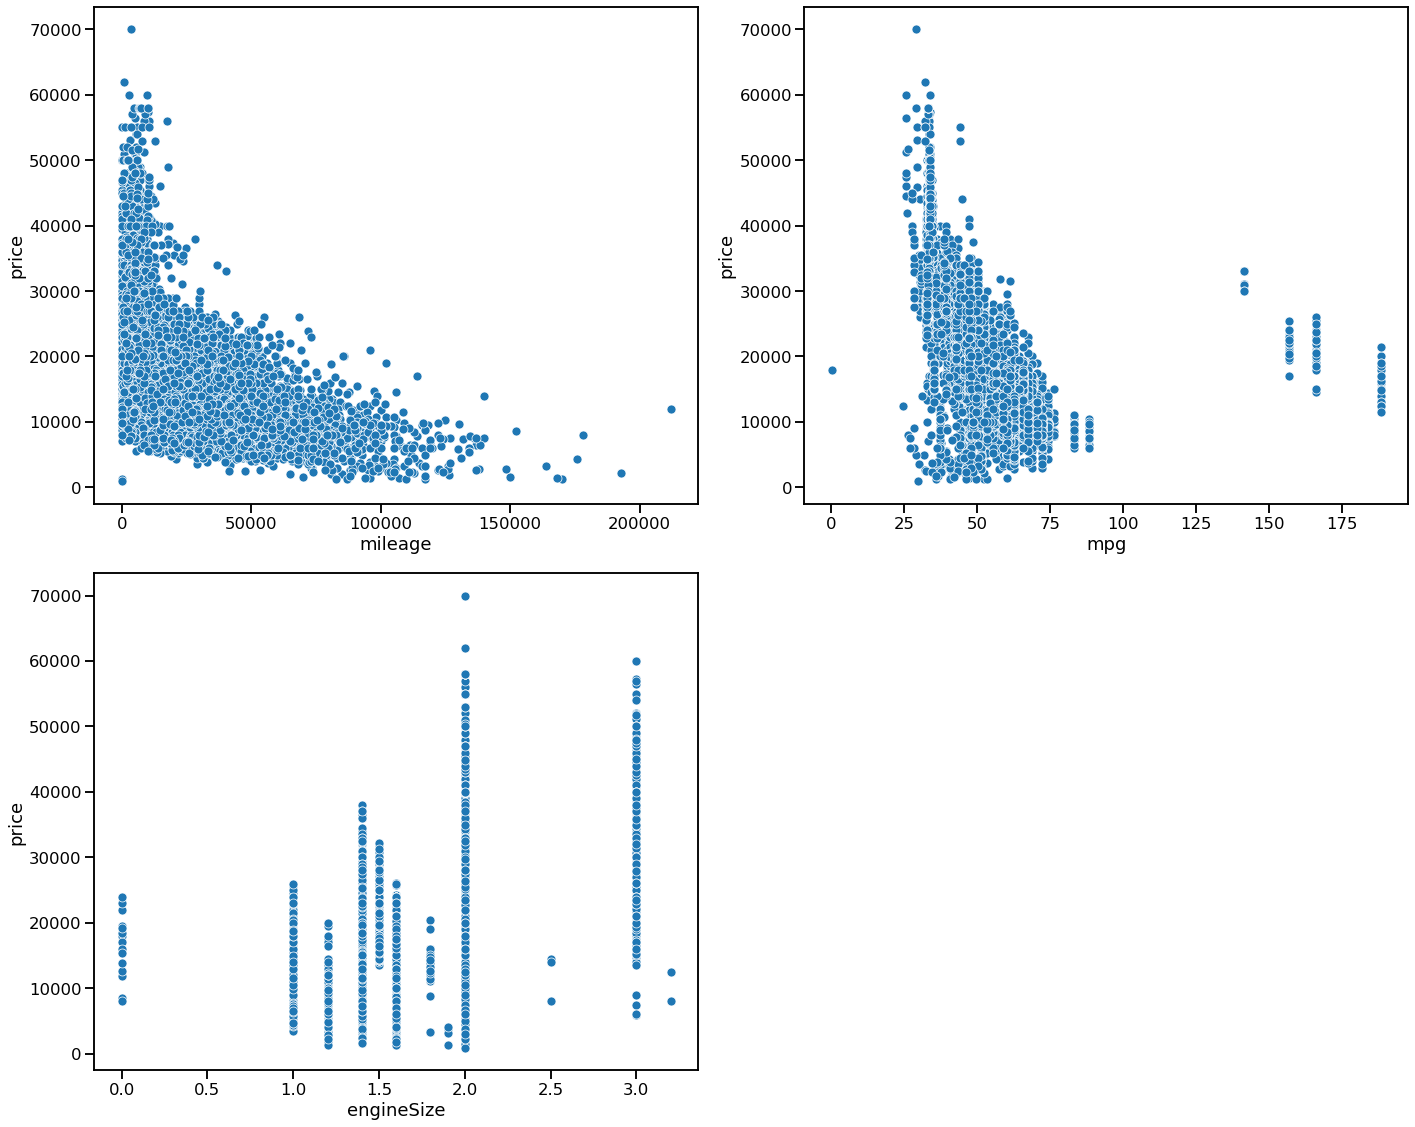

In [16]:
plt.figure(figsize=(20,16))

plt.subplot(2, 2, 1)
sns.scatterplot(x="mileage", y="price", data=df)

plt.subplot(2, 2, 2)
sns.scatterplot(x="mpg", y="price", data=df)

plt.subplot(2, 2, 3)
sns.scatterplot(x="engineSize", y="price", data=df)

plt.tight_layout()
plt.show()

<br> **NOTE**: price is negatively correlated with mileage,which means cars with more mileage have less price. relationship of mpg and enginesize with price is not clear from scatter plot.

#### 5. using the hue parameter

#### 5.1 using the hue parameter- fuelType

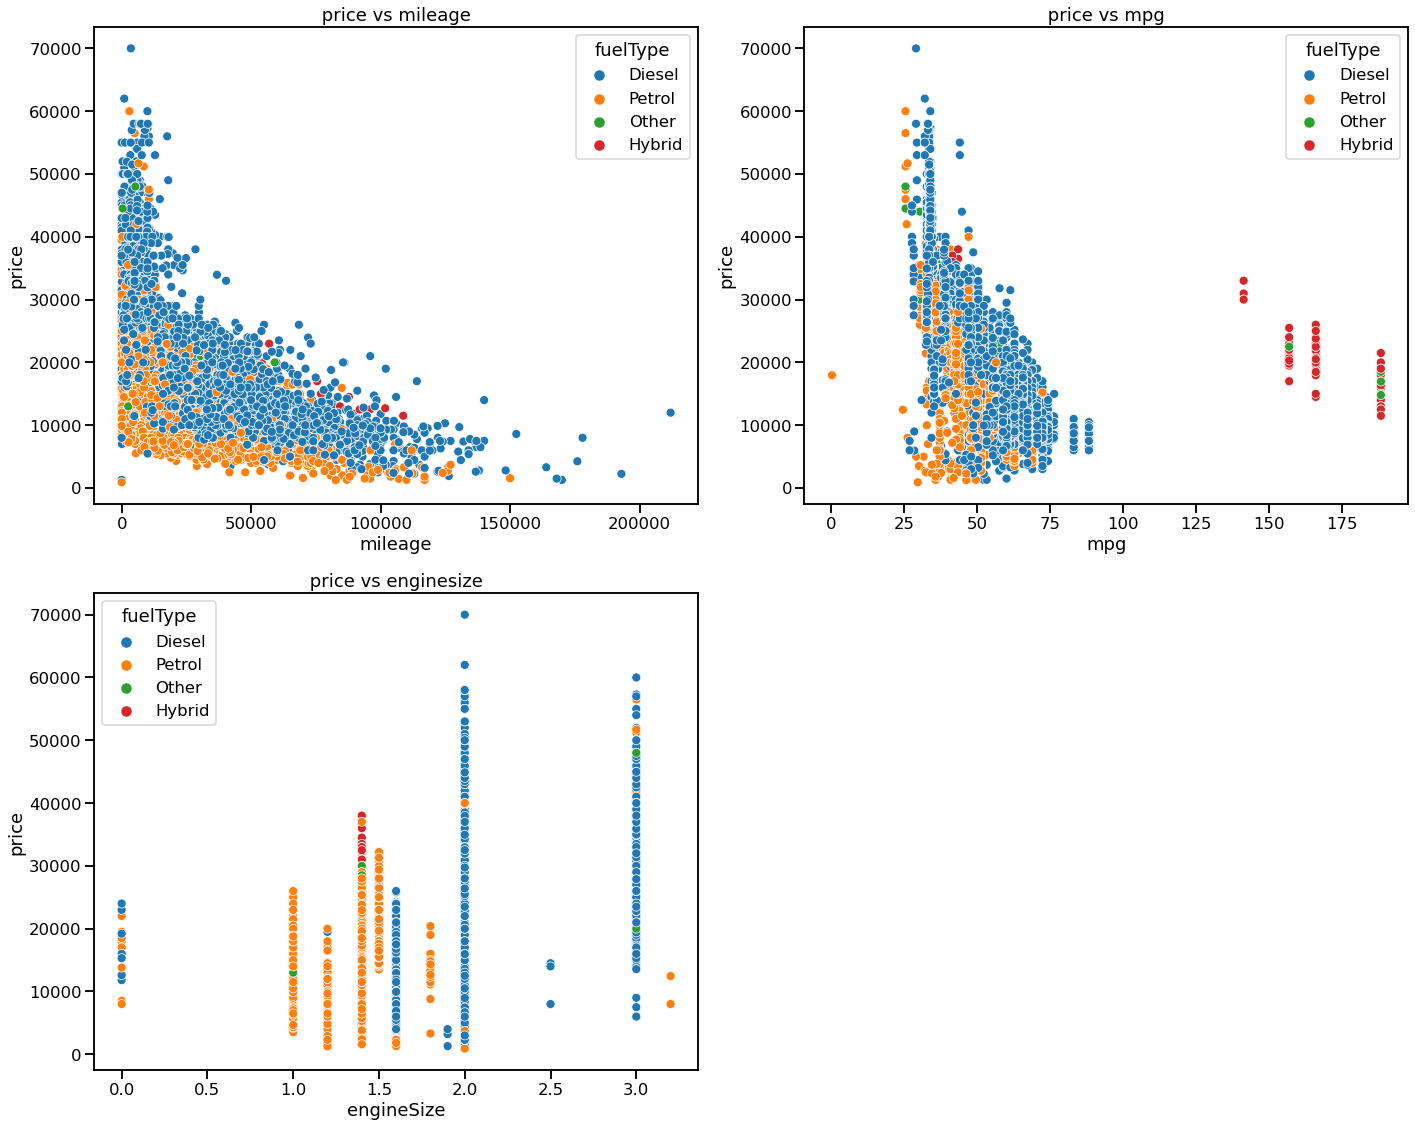

In [45]:
plt.figure(figsize=(20,16))

plt.subplot(2, 2, 1)
plt.title(" price vs mileage ")
sns.scatterplot(x="mileage", y="price", data=df, hue="fuelType")

plt.subplot(2, 2, 2)
plt.title(" price vs mpg ")
sns.scatterplot(x="mpg", y="price", data=df, hue="fuelType")

plt.subplot(2, 2, 3)
plt.title(" price vs enginesize ")
sns.scatterplot(x="engineSize", y="price", data=df, hue="fuelType")

plt.tight_layout()
plt.show()

<br> **NOTE**: According to all three plots, most petrol cars have lower price range.diesel cars are costlier irrespective of mileage. price of Hybrid cars varies from 12k to 24K $.

#### 5.2 using the hue parameter- transmission

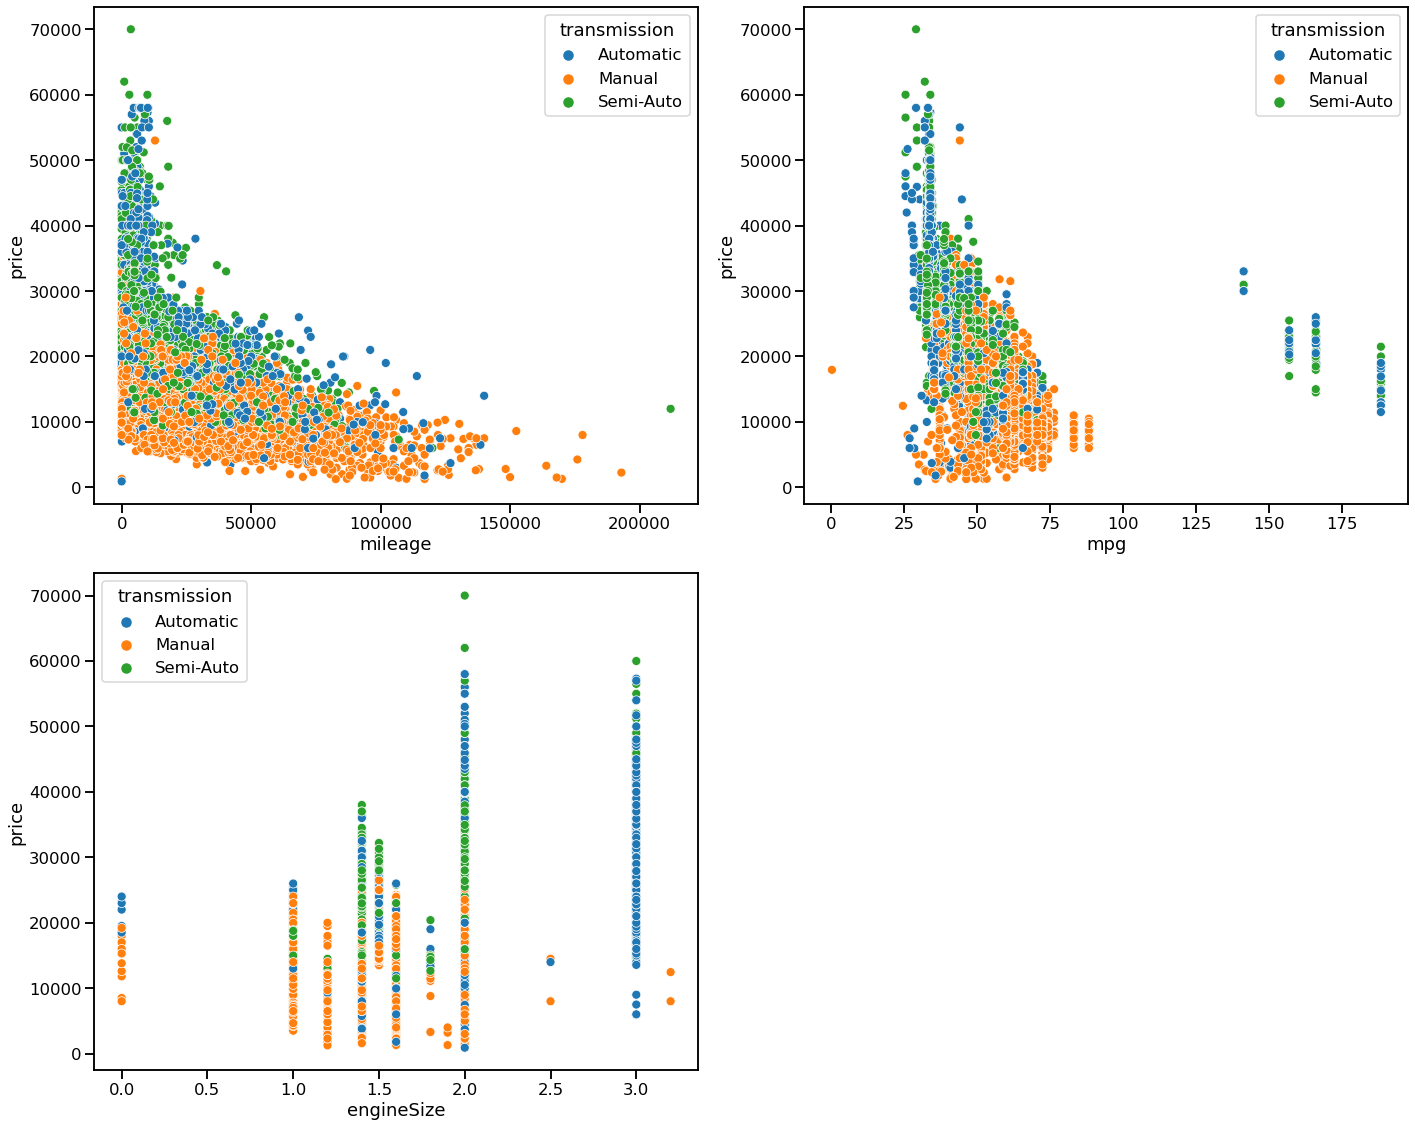

In [40]:
plt.figure(figsize=(20,16))

plt.subplot(2, 2, 1)
sns.scatterplot(x="mileage", y="price", data=df, hue="transmission")

plt.subplot(2, 2, 2)
sns.scatterplot(x="mpg", y="price", data=df, hue="transmission")

plt.subplot(2, 2, 3)
sns.scatterplot(x="engineSize", y="price", data=df, hue="transmission")

plt.tight_layout()
plt.show()

<br> **NOTE**: According to all three plots, most manual cars have lower price range.automatic cars are costlier irrespective of mileage, but in the low mileage(close to zero) semi automatic cars are expensive.

#### 5.3 Creating a trend line

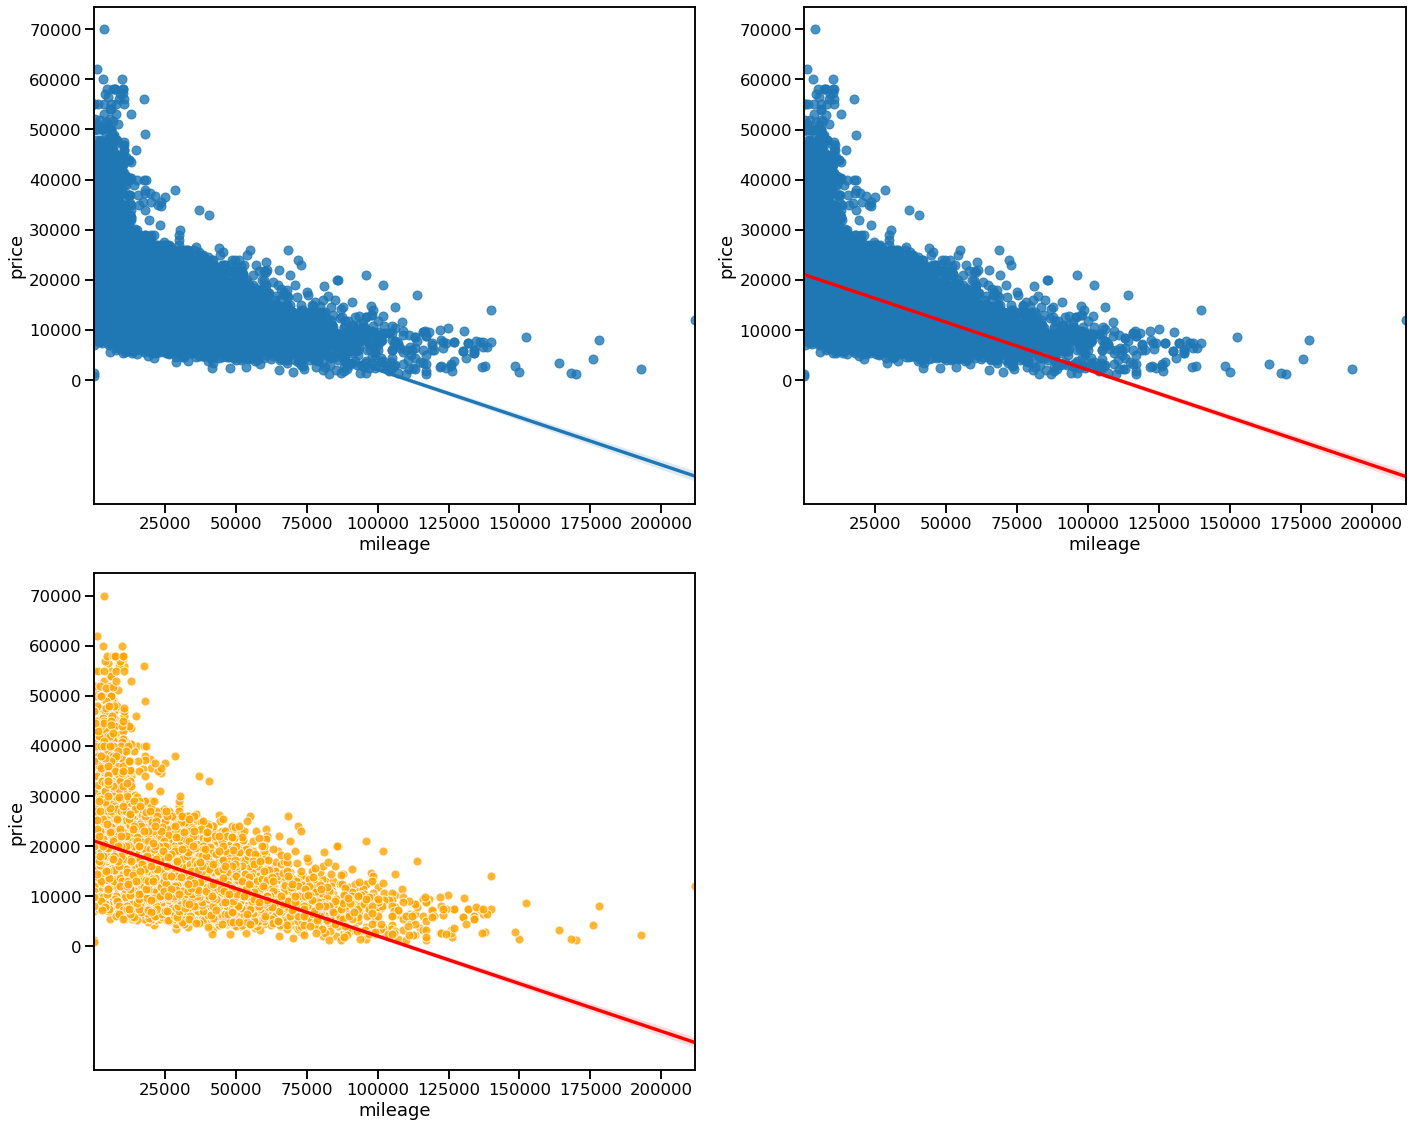

In [60]:
plt.figure(figsize=(20,16))


plt.subplot(2, 2, 1)
plt.yticks(np.arange(0,70001,10000))
sns.regplot(x="mileage", y="price", data=df)

plt.subplot(2, 2, 2)
plt.yticks(np.arange(0,70001,10000))
sns.regplot(x="mileage", y="price", data=df, line_kws={"color":"red"})

plt.subplot(2, 2, 3)
plt.yticks(np.arange(0,70001,10000))
sns.regplot(x="mileage", y="price", data=df,line_kws={"color":"r"}, scatter_kws={"color":"orange", "edgecolor":"white"})
#  line_kws for line,  scatter_kws is for scatter plot 

plt.tight_layout()
plt.show()

<br> **NOTE**: Regression line clearly indicates negative relationship between price and mileage.

#### 6. Pairplot

#### 6.1 Checking an example from the documentation

In [26]:
penguins = sns.load_dataset("penguins") # preloaded dataset in seaborn

display(penguins.head())
print(penguins.shape)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


(344, 7)


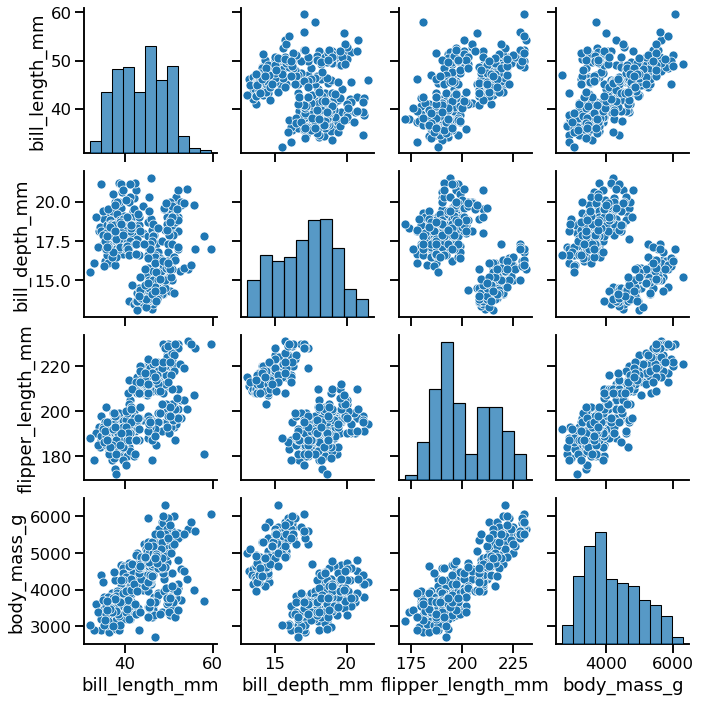

In [61]:
sns.pairplot(penguins)
plt.show()

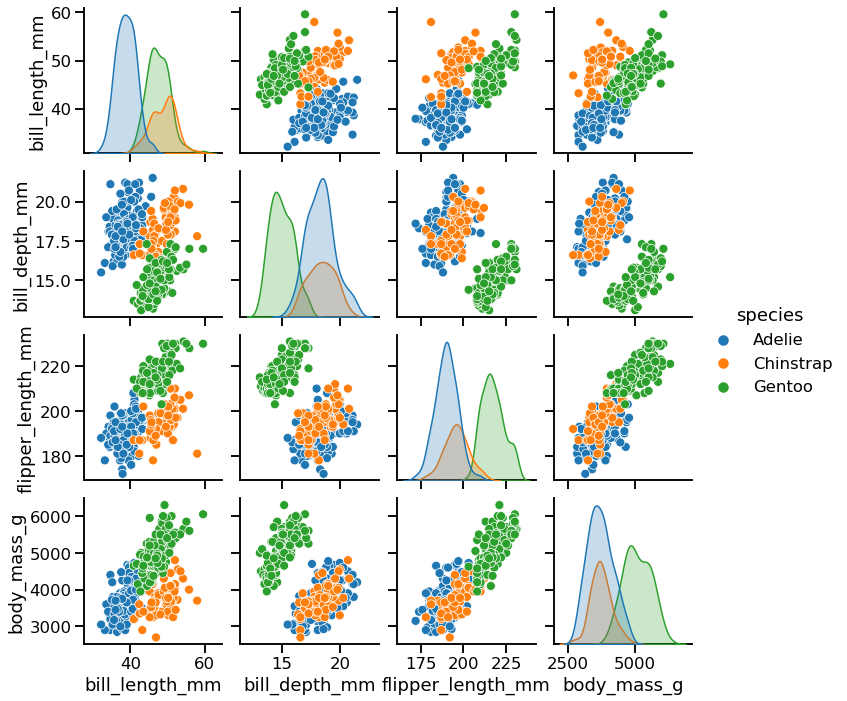

In [62]:
# add hue
sns.pairplot(penguins, hue="species")
plt.show()

 ### 6.2  pairplot in car dataset

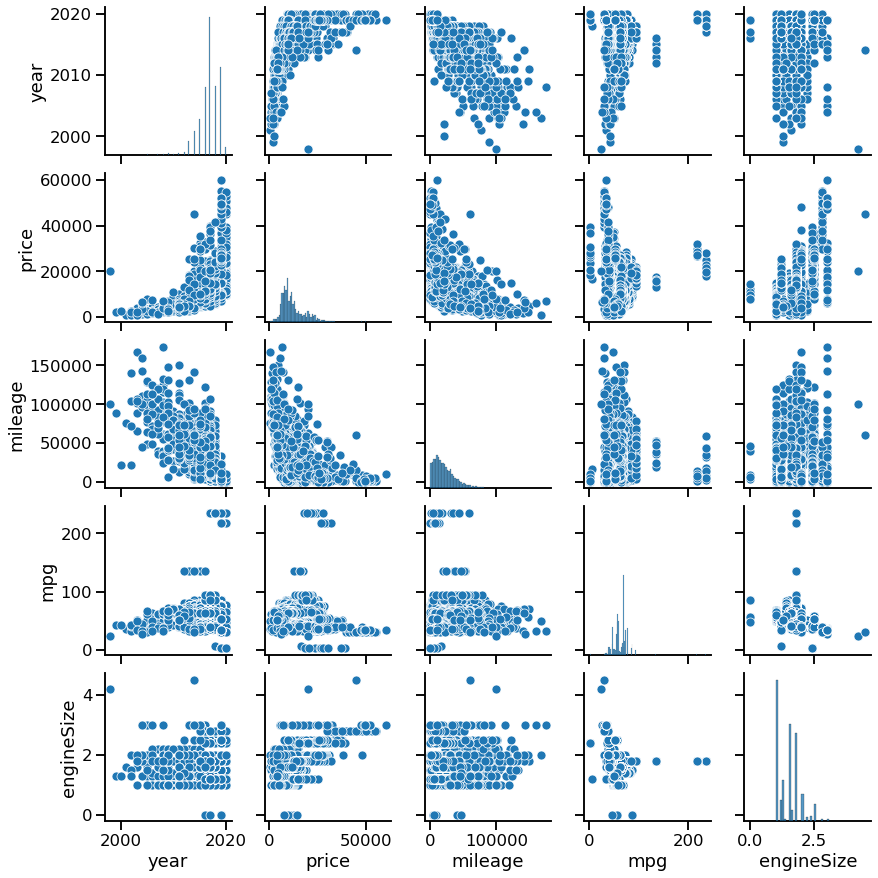

In [43]:
sns.pairplot(df) 
plt.show()

#### Removing the additional plots

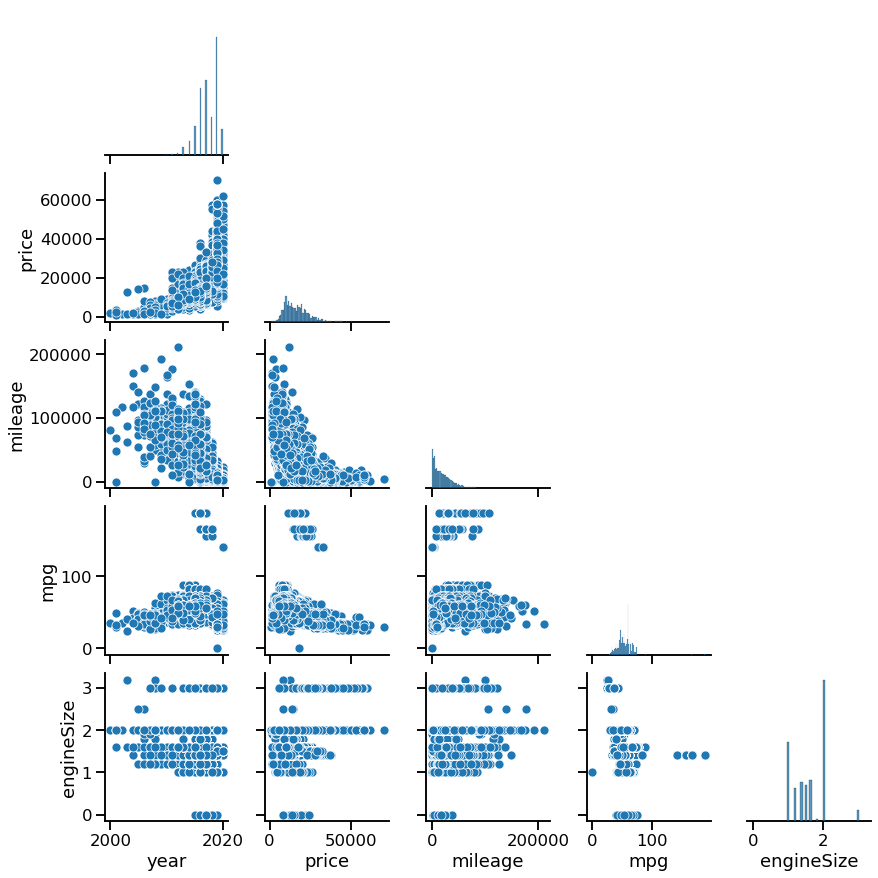

In [63]:
sns.pairplot(df, corner=True)

#### Adding categorical feature

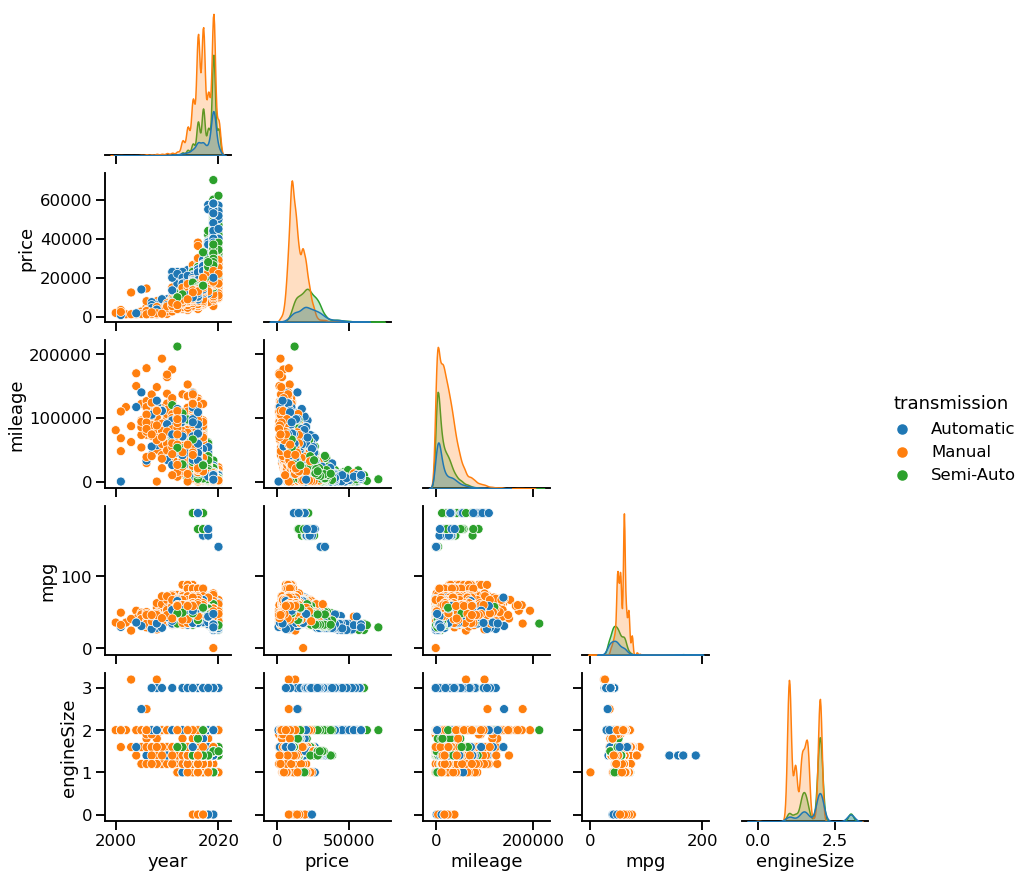

In [64]:
sns.pairplot(df, corner=True, hue="transmission")

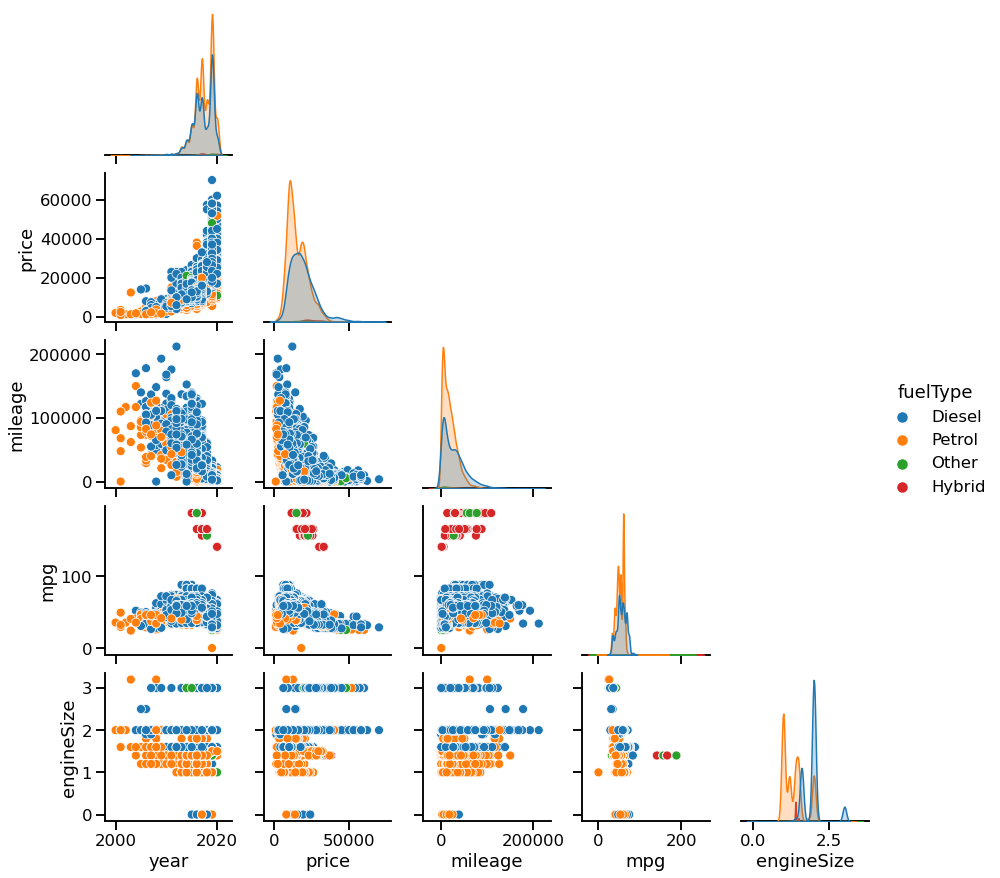

In [65]:
sns.pairplot(df, corner=True, hue="fuelType")

### --- FINISH---